# **Challenge Project: Computational Protein Function Assessment**
**David Zhao | Protein Bioinformatics | AS.410.639.01.FA25**

## Introduction to N-acetyl-L-ornithine transcarbamylase (AOTC) enzyme from *Xanthomonas campestris pv. campestris str. ATCC 33913*

*Xanthomonas campestris* N-acetyl-L-ornithine transcarbamylase (XcAOTC) is an enzyme responsible for catalyzing the following reaction:

carbamoyl phosphate (CP) + N<sub>2</sub>-acetyl-L-ornithine ⇌ phosphate + N-acetyl-L-citrulline

This enzyme belongs to the aspartate/ornithine carbamoyltransferase (ATCase/OTCase) superfamily.

A particularly interesting feature of XcAOTC is that it forms a trefoil knot upon complete folding between residues 171 and 278, *a very rare structural motif observed in only about 1% of all protein structures deposited in the PDB* (Jamroz et al., 2015). Even more intriguing is the role of this knot in modulating enzymatic activity. Ornithine transcarbamylase (OTCase), another member of the ATCase/OTCase family, instead processes L-ornithine. Research has demonstrated that unknotted OTCase homologs possess accessible residues between positions 263 and 268, which strongly interact with the ligand where AOTC cannot (Shi, D. et al., 2000).

This notebook will explore three structural questions related to AOTC. To do so, it is necessary to retrieve structural information related to this protein from the Protein Data Bank (PDB). We will begin by downloading the key structures of AOTC:

- **3KZC**: Crystal structure of XcAOTC
- **3KZN**: Crystal structure of XcAOTC complexed with N-acetyl-L-ornithine
- **3KZM**: Crystal structure of XcAOTC complexed with CP
- **3KZK**: Crystal structure of XcAOTC complexed with acetylcitrulline

In [1]:
from Bio import PDB
import os

AOTC_STRUCTURE_IDS = ["3kzc", "3kzn", "3kzm", "3kzk"]
# Make sure to have a folder in the current directory "./structures" to store downloaded structures.
STORED_STRUCTURES_PATH = "./structures"

pdb_list = PDB.PDBList(pdb=STORED_STRUCTURES_PATH)
aotc_cifs = [pdb_list.retrieve_pdb_file(pdb_code=structure) for structure in AOTC_STRUCTURE_IDS]

Structure exists: './structures/kz/3kzc.cif' 
Structure exists: './structures/kz/3kzn.cif' 
Structure exists: './structures/kz/3kzm.cif' 
Structure exists: './structures/kz/3kzk.cif' 


To get a general sense of the structure of the protein, we can view the downloaded files in our molecular visualizer of choice (PyMOL, Chimera, etc.). Alternatively, we can view them interactively in this notebook through py3Dmol. Let's visualize just the structure of the base AOTC enzyme with no ligands bound (3KZC):

In [2]:
import py3Dmol

# feel free to swap out which protein to visualize based on the index
with open(aotc_cifs[0]) as file: 
    aotc_system = "".join([x for x in file])

view1 = py3Dmol.view(width=800, height=600)
view1.addModelsAsFrames(aotc_system)
view1.setStyle({'model': -1}, {"cartoon": {'color': 'spectrum'}})
view1.zoomTo()
view1.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Research Questions this Notebook Explores 

### Functional Question 1: To what extent can substrate specificity in transcarbamylases be rationally engineered by mutating key residues?

Inspiration from Source Literature:
> "The substrate preference of AOTCase and SOTCase can be switched by mutating a few key residues. In a similar way, the substrate preference of PTCase can be changed from putrescine
to ornithine by mutating the substrate recognition loop."

Shi, Dashuang, Allewell, N. M., & Tuchman, M. (2015). From genome to structure and back again: A family portrait of the transcarbamylases. International Journal of Molecular Sciences, 16(8), 18836–18864. https://doi.org/10.3390/ijms160818836

**Need to knows**:
- How can we identify and extract the residues forming the substrate binding pocket from PDB structures?
- What computational methods can predict the effect of specific residue substitutions on substrate binding affinity?
- What sequence conservation features can be used to prioritize which residues are most likely to control specificity?

### Investigating Question 1

#### Background Information on Substrates for AOTCase and SOTCase

Both AOTCase and SOTCase take carbamoyl phosphate (CP) as a primary substrate. However, the secondary substrate for each differs:

<img src="images/N-Acetyl-L-ornithine.png">

<sub>N-acetyl-L-ornithine, the substrate for WT AOTCase.</sub>

<img src="images/N~2~-Succinylornithine.png">

<sub>N-succinylornithine, the substrate for WT SOTCase.</sub>

Succinylornithine is a larger structure than acetylornithine because of the second carboxylic acid group, and thus, two different enzymes must catalyze the reaction.

#### Case Study: Engineering XcAOTCase for Succinylornithine Specificity

Shi et al. demonstrated that the activity of XcAOTCase can be rationally engineered to interact with N-succinyl-L-ornithine instead of N-acetyl-L-ornithine, the WT substrate for the enzyme. The mutation of E92 to proline, serine, valine, and alanine all demonstrated catalytic activity with N-succinylnorvaline, a substrate analog of N-succinyl-L-ornithine.

The mechanism for this interaction is demonstrated below:

<img src="images/3kzn_active_site_e92_h180_r298.gif">

In WT AOTCase, E92 is stabilized by neighboring residues H180 and R298 through hydrogen bonding and electrostatic interactions.

<img src="images/3l05_active_site_succinylnorvaline.gif">

When AOTCase E92 is mutated (in this case to serine), neighboring residues H180 and R298 are free to interact with the substrate N-succinyl-L-ornithine instead through stabilizing the secondary carboxylic acid group of the molecule.

Investigating other mutations also reveals the same interactions between the neigboring residues and the substrate:

Alanine mutation:

<img src="images/3l02_active_site.gif">

Proline mutation:

<img src="images/3l04_active_site.gif">

Valine mutation:

<img src="images/3l06_active_site.gif">

The mutational study detected varying levels of activity for succinylornithine conversion, with activities E92S > E92V > E92A > E92P:

<table border="1">
  <tr>
    <th></th>
    <th colspan="3">Specific activity (µmol/min/mg)</th>
  </tr>
  <tr>
    <th>Protein</th>
    <th>Ornithine</th>
    <th>Acetylornithine</th>
    <th>Succinylornithine</th>
  </tr>
  <tr>
    <td>WT SOTCase</td>
    <td>ND</td>
    <td>ND</td>
    <td>238.4 ± 17.2</td>
  </tr>
  <tr>
    <td>WT AOTCase</td>
    <td>ND</td>
    <td>13.9 ± 0.4</td>
    <td>ND</td>
  </tr>
  <tr>
    <td>E92S AOTCase</td>
    <td>ND</td>
    <td>0.80 ± 0.03</td>
    <td>66.9 ± 2.2</td>
  </tr>
  <tr>
    <td>E92A AOTCase</td>
    <td>0.02 ± 0.01</td>
    <td>ND</td>
    <td>29.8 ± 1.1</td>
  </tr>
  <tr>
    <td>E92V AOTCase</td>
    <td>ND</td>
    <td>0.32 ± 0.02</td>
    <td>40.5 ± 1.8</td>
  </tr>
  <tr>
    <td>E92P AOTCase</td>
    <td>ND</td>
    <td>0.05 ± 0.01</td>
    <td>0.21 ± 0.01</td>
  </tr>
</table>

<sub><i>Table adapted from Shi et al., 2007</i></sub>

Where ND indicates that activity was not detected between the substrate and protein specified.

Interestingly, the activity for AOTCase E92P is much lower than in WT SOTCase, even though the corresponding residue in WT SOTCase is proline. This suggests that there are other structural features contributing to SOTCase activity than just P92 alone.


#### Exploring the Acetylornithine Binding Pocket of WT AOTCase

To visualize the binding pocket of AOTCase, I used PyMOL with several different views of the WT AOTCase in complex with N-acetyl-L-ornithine (PDB ID: 3KZN)

Topological view of acetylornithine binding pocket:

<img src="images/3kzn_active_site_topology.gif">

View of key residues E92, H180, R298 and residues within 3.5 Å of acetylornithine substrate. Generally interaction distances are < 3.3 Å, but I used 3.5 Å for a more lenient cutoff. 

To select these specific residues, in the PyMOL command line I did the following operations:

```bash
PyMOL>set assembly, 1 # views retrieved pdbs as biological assemblies
PyMOL>fetch 3kzn # retrieves pdb structure
PyMOL>remove resn hoh # removes all waters from structure
PyMOL>remove resn gol # removes all glycerols from structure
PyMOL>sele (resi 180+298+92) | (br. all within 3.5 of resn AOR) # selection algebra for selecting 3 specific residues mentioned before and all residues within 3.5 angstroms of acetylornithine, with name AOR in cif file.
PyMOL>show_as sticks, sele # represent selection as sticks
PyMOL>hide cartoon # display only relevant residues
```

<img src="images/3kzn_active_site_selected_residues.gif">

This is a clear image of the interactions shaping the favorability of binding between acetylornithine and the WT protein. The research group tested the kinetic question of how enzyme activity changes with the mutagenesis of E92. However, the thermodynamic favorability of binding is not extensively explored. For this question, we can systematically mutate residue E92 *in silico* and dock with different substrates to observe whether any differences in substrate favorability are observed.

To do this, we will use PyMOL to integrate mutations to our protein and AutoDock Vina to search different binding orientations between different substrates and the mutated proteins.

#### Python Scripting of AOTC Mutagenesis

PyMOL allows the user to do systematic mutagenesis on an input file through it's mutagenesis wizard. For this experiment, we will define the function to take an input file and create a new cif file which is the mutated protein, with optimized side chain orientation.

In [3]:
import pymol
from pymol import cmd

def create_mutant(input_file, pdb_id, chain, residue_number, new_residue, output_file):

    os.makedirs(os.path.dirname(output_file), exist_ok=True)
    
    pymol.finish_launching(['pymol', '-qc']) # start pymol in quiet mode

    cmd.load(input_file, pdb_id)

    cmd.wizard("mutagenesis")
    selection = f"/{pdb_id}//{chain}/{residue_number}"
    cmd.get_wizard().do_select(selection)
    cmd.get_wizard().set_mode(new_residue) 
    cmd.get_wizard().apply()
    cmd.set_wizard()

    cmd.sculpt_activate(pdb_id)
    cmd.sculpt_iterate(pdb_id, cycles=100)
    cmd.sculpt_deactivate(pdb_id)

    cmd.save(output_file, pdb_id)

    cmd.delete("all")
    print(f"Created mutant at: {output_file}")

Next we will define several constants specific to our experiment on AOTCase. We will incorporate the same mutations to the WT protein and save them to respective cif files.

In [4]:
MUTATIONS = {
    'E92A': 'ALA',
    'E92S': 'SER',
    'E92V': 'VAL',
    'E92P': 'PRO',
    'WT':'GLU' # not a mutation, but for convenience I added it here
}

APO_ENZYME_CIF = "./structures/kz/3kzc.cif"
APO_ENZYME_PDB_ID = "3kzn"
MUTANT_DIRECTORY = "./structures/mutants"
LIGAND_DIRECTORY = "./ligands"
PROTEIN_NAME = "AOTCase"

for mutant_name, residue_code in MUTATIONS.items():
    create_mutant(
        input_file=APO_ENZYME_CIF,
        pdb_id=APO_ENZYME_PDB_ID,
        chain="A",
        residue_number=92,
        new_residue=residue_code,
        output_file=os.path.join(MUTANT_DIRECTORY, f"{PROTEIN_NAME}_{mutant_name}.cif")
    )

Selected!
 Mutagenesis: 13 rotamers loaded.
 Rotamer 13/13, strain=2.55
 Rotamer 13/13, strain=2.55
 ExecutiveRMSPairs: RMSD =    0.036 (4 to 4 atoms)
 Mutagenesis: no rotamers found in library.
Created mutant at: ./structures/mutants/AOTCase_E92A.cif
Selected!
 ExecutiveRMSPairs: RMSD =    0.036 (4 to 4 atoms)
 Mutagenesis: no rotamers found in library.
 ExecutiveRMSPairs: RMSD =    0.031 (4 to 4 atoms)
 Mutagenesis: 3 rotamers loaded.
 Rotamer 2/3, strain=11.14
 Rotamer 2/3, strain=11.14
Created mutant at: ./structures/mutants/AOTCase_E92S.cif
Selected!
 ExecutiveRMSPairs: RMSD =    0.031 (4 to 4 atoms)
 Mutagenesis: 3 rotamers loaded.
 Rotamer 2/3, strain=11.14
 Rotamer 2/3, strain=11.14
 ExecutiveRMSPairs: RMSD =    0.036 (4 to 4 atoms)
 Mutagenesis: 3 rotamers loaded.
 Rotamer 3/3, strain=12.24
 Rotamer 3/3, strain=12.24
Created mutant at: ./structures/mutants/AOTCase_E92V.cif
Selected!
 ExecutiveRMSPairs: RMSD =    0.036 (4 to 4 atoms)
 Mutagenesis: 3 rotamers loaded.
 Rotamer 3/

#### Scripting of Receptor and Substrate Preparation from CIF and SDF Files

Before docking of a substrate and protein can occur we need to filter the protein structure to retain only standard amino acid residues. To accomplish this we take a custom `StandardAminoAcidOnly()` class which extends the `Select` class from Bio.PDB to select residues of interest.

AutoDock Vina requires the receptor and the ligand to be in pdbqt form for docking to occur. Structures for the substrates acetylornithine, succinylornithine, and ornithine were retrieved from PubChem and downloaded in sdf form. To convert cif and sdf files to the appropriate pdbqt file format, the [Meeko](https://meeko.readthedocs.io/en/release-doc/installation.html) AutoDock Vina interface is used.

In [ ]:
from Bio.PDB import PDBIO, MMCIFParser, Select
import os
import subprocess

class StandardAminoAcidOnly(Select):
    """Filter to only standard amino acids. Removes all other residues (water, ligands, etc.)"""
    
    STANDARD_RESIDUES = {
        'ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'GLY', 'HIS', 'ILE',
        'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL'
    }
    
    def accept_residue(self, residue):
        """Accept only standard amino acids"""
        resname = residue.get_resname().strip()
        return resname in self.STANDARD_RESIDUES

def cif_to_clean_pdb(cif_file, output_pdb):
    # this function is necessary because Meeko cannot accept .cif files. 
    # However, this also cleans up the protein through StandardAminoAcidOnly()
    parser = MMCIFParser(QUIET=True)
    structure = parser.get_structure('protein', cif_file)
    
    io = PDBIO()
    io.set_structure(structure)
    io.save(output_pdb, StandardAminoAcidOnly())
    
    print(f"Cleaned PDB file for protein created at {output_pdb}")
    return output_pdb

def clean_and_prepare_receptor(cif_file, pdbqt_output):
    
    temp_pdb = cif_file.replace('.cif', '_clean.pdb')
    
    try:
        # create clean PDB with only standard residues
        cif_to_clean_pdb(cif_file, temp_pdb)
        
        # convert pdb to pdbqt
        # NOTE: this workflow will allow bad quality residues. For more stringent workflows remove the --allow_bad_res flag.
        result = subprocess.run(
            ['mk_prepare_receptor.py', '-i', temp_pdb, '-o', pdbqt_output, '-p', '--allow_bad_res'],
            check=True,
            capture_output=True,
            text=True
        )
        
        print(f"Successfully converted {cif_file} to {pdbqt_output}.pdbqt")
        return pdbqt_output
        
    except subprocess.CalledProcessError as e:
        print(f"Conversion failed:")
        print(f"    stdout: {e.stdout}")
        print(f"    stderr: {e.stderr}")
        raise
        
    finally:
        # removes temporary pdb file, if it exists
        if os.path.exists(temp_pdb):
            os.remove(temp_pdb)
            print(f"Cleaned up {temp_pdb}")

def sdf_to_pdbqt(sdf_file):
    try:
        result = subprocess.run(
            ['mk_prepare_ligand.py', '-i', sdf_file],
            check=True,
            capture_output=True,
            text=True
        )
        output_pdbqt = sdf_file[:-3] + "pdbqt"
        print(f"Successfully converted {sdf_file} to {output_pdbqt}")
        return output_pdbqt
        
    except subprocess.CalledProcessError as e:
        print(f"Conversion failed:")
        print(f"    stdout: {e.stdout}")
        print(f"    stderr: {e.stderr}")
        raise

Now we can use these functions to convert all mutant protein files in the mutant directory to pdbqt format and all substrates in the ligand library to pdbqt format:

In [ ]:
print("Converting mutant proteins to .pdbqt...")
for file in os.listdir(os.fsencode(MUTANT_DIRECTORY)):
    filename = os.fsdecode(file)
    if filename.endswith(".cif"):
        clean_and_prepare_receptor(os.path.join(MUTANT_DIRECTORY, filename), os.path.join(MUTANT_DIRECTORY, filename[:-4]))

print("Converting substrates to .pdbqt...")
for file in os.listdir(os.fsencode(LIGAND_DIRECTORY)):
    filename = os.fsdecode(file)
    if filename.endswith(".sdf"):
        sdf_to_pdbqt(os.path.join(LIGAND_DIRECTORY, filename))

Cleaned PDB file for protein created at ./structures/mutants/AOTCase_E92V_clean.pdb
Successfully converted ./structures/mutants/AOTCase_E92V.cif to ./structures/mutants/AOTCase_E92V.pdbqt
Cleaned up ./structures/mutants/AOTCase_E92V_clean.pdb
Cleaned PDB file for protein created at ./structures/mutants/AOTCase_E92S_clean.pdb
Successfully converted ./structures/mutants/AOTCase_E92S.cif to ./structures/mutants/AOTCase_E92S.pdbqt
Cleaned up ./structures/mutants/AOTCase_E92S_clean.pdb
Cleaned PDB file for protein created at ./structures/mutants/AOTCase_E92A_clean.pdb
Successfully converted ./structures/mutants/AOTCase_E92A.cif to ./structures/mutants/AOTCase_E92A.pdbqt
Cleaned up ./structures/mutants/AOTCase_E92A_clean.pdb
Cleaned PDB file for protein created at ./structures/mutants/AOTCase_WT_clean.pdb
Successfully converted ./structures/mutants/AOTCase_WT.cif to ./structures/mutants/AOTCase_WT.pdbqt
Cleaned up ./structures/mutants/AOTCase_WT_clean.pdb
Cleaned PDB file for protein created

#### Molecular Docking Studies with AutoDock Vina

We need to create a class to perform docking between a ligand and our mutated and WT proteins. This class will contain the logic for setting the exhaustiveness of docking testing and the number of poses to test out, and also carrying out the actual docking itself through `prepare_receptor` and `dock_ligand`.

In [7]:
from vina import Vina
import pandas as pd
import os

class MolecularDocker:

    def __init__(self, exhaustiveness=0, n_poses=10):

        self.exhaustiveness = exhaustiveness
        self.n_poses = n_poses
        self.results = []

    def dock_ligand(self, receptor_pdbqt, ligand_pdbqt, center, box_size, output_dir='docking_results', name='docking'):

        os.makedirs(output_dir, exist_ok=True)
        v = Vina(sf_name='vina')

        v.set_receptor(receptor_pdbqt)
        v.set_ligand_from_file(ligand_pdbqt)

        v.compute_vina_maps(center=center, box_size=box_size)

        print(f"Docking ligand...")
        v.dock(exhaustiveness=self.exhaustiveness, n_poses=self.n_poses)

        energies = v.energies()

        output_poses = os.path.join(output_dir, f"{name}_poses.pdbqt")
        v.write_poses(output_poses, n_poses=self.n_poses, overwrite=True)

        best_affinity = energies[0][0]

        results_dict = {
            'name':name,
            'receptor':receptor_pdbqt,
            'ligand':ligand_pdbqt,
            'best_affinity':best_affinity, 
            'all_energies':energies,
            'output_poses':output_poses
        }

        self.results.append(results_dict)

        print(f"\nDocking complete with {receptor_pdbqt} and {ligand_pdbqt}. Best affinity = {best_affinity:.2f} kcal/mol")

        return results_dict
    
    def batch_dock(self, receptor_dict, ligand_dict, center, box_size, output_dir):
        
        # receptor_dict and ligand_dict is name:pdbqt file path

        all_results = []

        for receptor_name, receptor_path in receptor_dict.items():
            for ligand_name, ligand_path in ligand_dict.items():
                try:
                    name = f"{receptor_name}_{ligand_name}"
                    result = self.dock_ligand(
                        receptor_path,
                        ligand_path,
                        center,
                        box_size,
                        output_dir,
                        name
                    )
                    result['receptor_name'] = receptor_name
                    result['ligand_name'] = ligand_name
                    all_results.append(result)
                except Exception as e:
                    print(f"Failed to dock {receptor_name} and {ligand_name}: {e}")

        results_df = pd.DataFrame([
            {
                'Receptor':r['receptor_name'],
                'Ligand':r['ligand_name'],
                'Binding_Affinity':r['best_affinity']
            } for r in all_results
        ])

        return results_df


In [8]:
BINDING_POCKET_COORDS = (109.36, 44.79, 84.2) # Determined through coordinates on substrate bound model of protein, 3kzn
SEARCH_BOX_SIZE = (20, 20, 20) 

RECEPTOR_DICT = {
    mutant:os.path.join(MUTANT_DIRECTORY, f"{PROTEIN_NAME}_{mutant}.pdbqt") 
    for mutant in MUTATIONS.keys()
}

LIGAND_DICT = {
    'N-acetyl-L-ornithine':'ligands/acetylornithine.pdbqt',
    'N-succinyl-L-ornithine':'ligands/succinylornithine.pdbqt'
}

LIGAND_DICT = {
    os.path.splitext(ligand_file)[0]:os.path.join(LIGAND_DIRECTORY, ligand_file)
    for ligand_file in os.listdir(LIGAND_DIRECTORY)
    if ligand_file.endswith(".pdbqt")
}

docker = MolecularDocker(exhaustiveness=10, n_poses=10) 

results_df = docker.batch_dock(
    receptor_dict=RECEPTOR_DICT,
    ligand_dict=LIGAND_DICT,
    center=BINDING_POCKET_COORDS,
    box_size=SEARCH_BOX_SIZE,
    output_dir='docking_results'
)

Computing Vina grid ... done.
Docking ligand...
Performing docking (random seed: 780927729) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -5.945          0          0
   2       -5.492      2.655      6.581
   3       -5.419      2.449      6.563
   4       -5.323      4.314      6.443
   5       -5.237      6.167      8.383
   6       -5.164        4.1      6.489
   7       -5.095      2.558       6.22
   8        -5.04      2.906      6.685
   9       -4.993      5.778      8.476
  10       -4.985      4.218      6.055

Docking complete with ./structures/mutants/AOTCase_E92A.pdbqt and ./ligands/succinylornithine.pdbqt. Best affinity = -5.95 kcal/mol
Computing Vina grid ... done.
Docking ligand...


Performing docking (random seed: -1745578395) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -4.873          0          0
   2       -4.872      12.02      13.03
   3       -4.745      3.181      4.516
   4       -4.683      11.85      12.84
   5       -4.647      1.469      1.693
   6       -4.585      3.158      4.066
   7       -4.463      10.32      11.16
   8       -4.271      4.261      5.307
   9       -4.023      6.259      7.084
  10       -3.986      4.862      5.836

Docking complete with ./structures/mutants/AOTCase_E92A.pdbqt and ./ligands/ornithine.pdbqt. Best affinity = -4.87 kcal/mol
Computing Vina grid ... Docking ligand...
done.
Performing docking (random seed: -1343210839) ... 
0%   10   20   30   40   50   60   70   80 


Docking complete with ./structures/mutants/AOTCase_E92A.pdbqt and ./ligands/acetylornithine.pdbqt. Best affinity = -5.16 kcal/mol
Computing Vina grid ... done.
Docking ligand...
Performing docking (random seed: 1065825558) ... 
Docking complete with ./structures/mutants/AOTCase_E92S.pdbqt and ./ligands/succinylornithine.pdbqt. Best affinity = -5.99 kcal/mol

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -5.985          0          0
   2        -5.54      2.978      6.674
   3       -5.424      2.651       6.57
   4       -5.362      6.166      8.798
   5        -5.15      5.929      8.068
   6       -5.147      2.474      5.696
   7        -5.14      4.531      6.846
   8       -5.121      2.247      5.636
   9       -5.076      4.153      6.


Docking complete with ./structures/mutants/AOTCase_E92S.pdbqt and ./ligands/ornithine.pdbqt. Best affinity = -4.89 kcal/mol
Computing Vina grid ... Docking ligand...
done.
Performing docking (random seed: -416968333) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -5.216          0          0
   2       -4.866      5.191       6.61
   3       -4.828      2.423      3.978
   4       -4.586      1.705      4.069
   5       -4.546      2.473      3.679
   6       -4.535      8.705      10.51
   7       -4.513      4.072      6.906
   8       -4.509      7.737      9.413
   9       -4.424      7.488      8.383
  10       -4.305      4.673      6.425

Docking complete with ./structures/mutants/AOTCase_E92S.pdbqt and ./ligands/acetylornithine.pd

Docking ligand...
Performing docking (random seed: -1000990507) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -4.889          0          0
   2       -4.841      12.13      13.12
   3       -4.747      3.271       4.51
   4       -4.685      2.371      3.053
   5       -4.644      11.35      12.22
   6       -4.553      11.98      12.79
   7       -4.532      3.074      4.001
   8       -4.429      10.37      11.15
   9       -4.373      2.003       2.21
  10       -4.217      2.569      2.704

Docking complete with ./structures/mutants/AOTCase_E92V.pdbqt and ./ligands/ornithine.pdbqt. Best affinity = -4.89 kcal/mol


Docking ligand...Computing Vina grid ... done.



Performing docking (random seed: -679527405) ... 
Docking complete with ./structures/mutants/AOTCase_E92V.pdbqt and ./ligands/acetylornithine.pdbqt. Best affinity = -5.18 kcal/mol

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -5.184          0          0
   2       -4.803       2.45       3.93
   3       -4.791      4.989      6.403
   4       -4.752      4.537      6.084
   5       -4.388      2.624      3.826
   6       -4.383      3.074      4.394
   7       -4.378      4.155      7.108
   8       -4.373      8.648      10.41
   9       -4.277       7.39      9.378
  10       -4.216       6.56      7.815
Computing Vina grid ... done.
Docking ligand...
Performing docking (random seed: 221574868) ... 
0%   10   20   30   40   50   60   70   

Computing Vina grid ... Docking ligand...
done.
Performing docking (random seed: -1942309468) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -4.847          0          0
   2       -4.707       10.3      11.58
   3       -4.644       1.75      2.039
   4       -4.627      12.44      12.98
   5       -4.585      2.821      3.956
   6       -4.442      1.885      2.236
   7        -4.26       1.92      2.328
   8       -4.236      12.39      13.07
   9       -4.224      12.35      13.01
  10       -4.019      3.383      5.058

Docking complete with ./structures/mutants/AOTCase_E92P.pdbqt and ./ligands/ornithine.pdbqt. Best affinity = -4.85 kcal/mol
Computing Vina grid ... done.
Docking ligand...


Performing docking (random seed: 397894655) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -5.256          0          0
   2       -4.872      5.048      6.475
   3       -4.841      2.496      4.223
   4       -4.746      4.445      5.918
   5       -4.537      4.335      7.289
   6       -4.452      3.242      4.545
   7       -4.411      2.802      5.126
   8       -4.311      7.556      9.807
   9       -4.223      2.005      4.218
  10       -4.123      3.473      4.686

Docking complete with ./structures/mutants/AOTCase_E92P.pdbqt and ./ligands/acetylornithine.pdbqt. Best affinity = -5.26 kcal/mol
Computing Vina grid ... done.
Docking ligand...
Performing docking (random seed: 1281974446) ... 
0%   10   20   30   40   50   60   70   

Computing Vina grid ... Docking ligand...

Docking complete with ./structures/mutants/AOTCase_WT.pdbqt and ./ligands/ornithine.pdbqt. Best affinity = -4.85 kcal/mol
done.
Performing docking (random seed: 316419063) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -4.851          0          0
   2       -4.728      10.28      11.55
   3       -4.713      12.54      13.09
   4       -4.688      2.708      3.769
   5        -4.63      1.722      1.953
   6       -4.584      10.78      11.93
   7       -4.401      1.877      2.254
   8       -4.209      11.89      12.88
   9       -4.075      12.35      12.82
  10       -3.997      9.588      10.89
Computing Vina grid ... Docking ligand...

Docking complete with ./structures/mutants/AOTCase_WT.p

In [9]:
results_df

,Receptor,Ligand,Binding_Affinity
0,E92A,succinylornithine,-5.945
1,E92A,ornithine,-4.873
2,E92A,acetylornithine,-5.158
3,E92S,succinylornithine,-5.985
4,E92S,ornithine,-4.892
5,E92S,acetylornithine,-5.216
6,E92V,succinylornithine,-5.941
7,E92V,ornithine,-4.889
8,E92V,acetylornithine,-5.184
9,E92P,succinylornithine,-6.071


#### Visualizing Docking Results

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_binding_affinities(results_df:pd.DataFrame, output_png):

    pivot_df = results_df.pivot(
        index='Receptor',
        columns='Ligand',
        values='Binding_Affinity'
    )

    plt.figure(figsize=(5, 8))
    sns.heatmap(
        pivot_df,
        annot=True,
        fmt='.2f',
        cmap='RdYlGn_r',
        cbar_kws={'label':'Receptor-Substrate Interactions'}
    )
    plt.title("Binding Affinities: Receptor-Substrate Interactions")
    plt.tight_layout()
    plt.savefig(output_png, dpi=300)
    print(f"Saved heatmap at {output_png}")
    plt.show()
    
def compare_mutants(results_df:pd.DataFrame, ligand_name, output_png="mutant_comparisons.png"):
    ligand_subset = results_df[results_df['Ligand'] == ligand_name].copy()
    ligand_subset = ligand_subset.sort_values('Binding_Affinity')

    plt.figure(figsize=(10,6))
    plt.barh(
        ligand_subset['Receptor'],
        ligand_subset['Binding_Affinity'],
        color='steelblue',
        edgecolor='black'
    )
    plt.xlabel('Binding Affinity (kcal/mol)')
    plt.ylabel('Receptor Protein')
    plt.title(f"Binding Affinity Comparison for {ligand_name}")
    plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
    plt.tight_layout()
    plt.savefig(output_png, dpi=300)
    print(f"Saved comparison plot to {output_png}")
    plt.show()

Saved heatmap at docking_results/heatmap.png


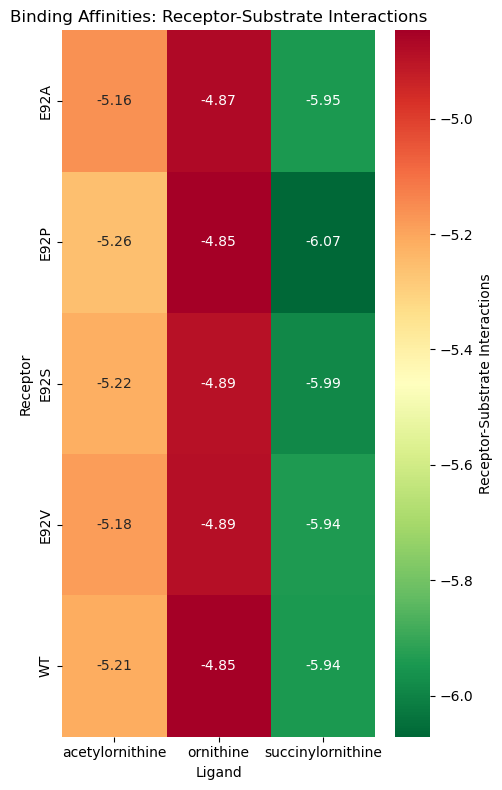

In [11]:
plot_binding_affinities(results_df=results_df, output_png="docking_results/heatmap.png")

Saved comparison plot to N-acetyl-L-ornithine_binding_affinities


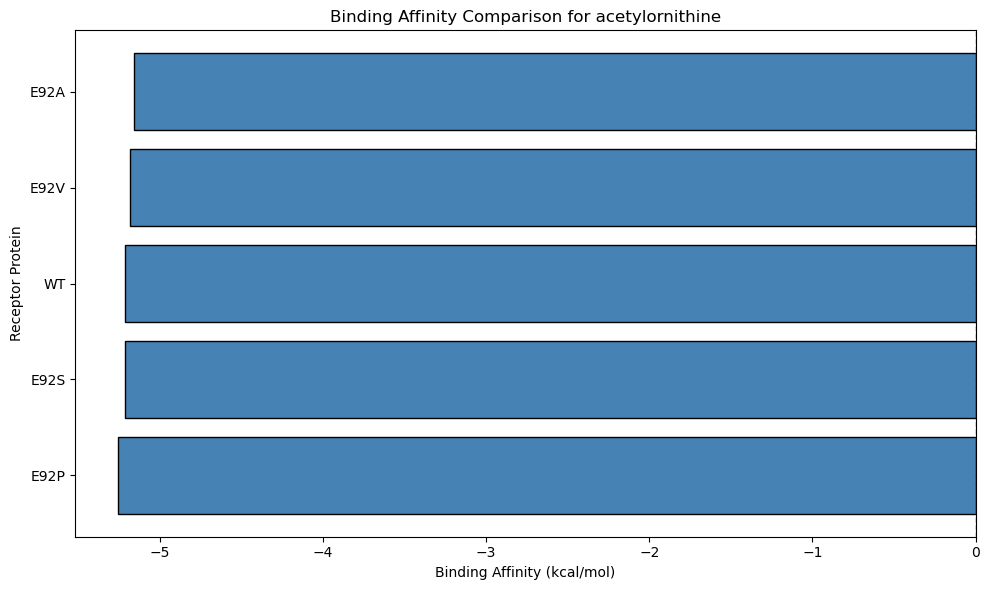

In [12]:
compare_mutants(results_df=results_df, ligand_name='acetylornithine', output_png='N-acetyl-L-ornithine_binding_affinities')

### Structural Question 2: How do catabolic transcarbamylases (e.g. PTCase, YTCase) evolve mechanisms to prevent higher-order oligomerization, and what are the functional consequences of this constraint?

Inspiration from Source Literature:

> "The functional unit of all other transcarbamylases is a homotrimer. This is expected for AOTCase and SOTCase since both of them play an anabolic role in the arginine biosynthetic pathway. Even though PTCase and YTCase were proposed to play a catabolic role, both function as homotrimers. Both PTCase and YTCase have one interesting common structural feature; the first N-terminal helix (the equivalent helix is the second helix in the YTCase structure because of the presence of an extra N-terminal helix) is covered by other helices. In PTCase, the characteristic C-terminal long helix (helix 13) covers helix 1 and it was proposed that a function of the C-terminal helix is to prevent the formation of a larger oligomer, since PTCase without the C-terminal helix will form a hexamer or an even larger oligomer. In YTCase, the equivalent helix is buried by the additional helices at both the N- and C-termini. Whether or not the additional helices in YTCase play a role similar to the last C-terminal helix in PTCase is unknown. It would be interesting to know why these catabolic transcarbamylases develop mechanisms that prevent formation of higher oligomers".

Shi, Dashuang, Allewell, N. M., & Tuchman, M. (2015). From genome to structure and back again: A family portrait of the transcarbamylases. International Journal of Molecular Sciences, 16(8), 18836–18864. https://doi.org/10.3390/ijms160818836

**Need to Knows**:
- How can we compare sequence and structural features to conclude which features promote oligomerization and which features prevent it?
- What evolutionary analysis tools (e.g. phylogenetic tools) can we use to reveal when oligomerization blocking features emerged?
- How can we model functional consequences of oligomerization?

### Investigating Question 2

#### Visualizing Biological Assembly of Various Transcarbamylases

As mentioned in the literature source, the functional unit of AOTCase and SOTCase are homotrimers. If we view the biological assembly of AOTCase in PyMOL:

<img src="images/.xdp-3kzn_biological_assembly.png-gqdQWl">

We can clearly see the homotrimers forming the structure of the enzyme. However, Shi et al. mention that oligomeric assemblies of some OTCases have higher oligomeric structures. A hyperthermophilic species of archaea, *Pyrococcus furiosus*, assembles OTCase in a dodecamer (with four asymmetric subunits) instead of the three commonly found in OTCases in other species:

<img src="images/.xdp-1a1s_assembly.png-CrwABE">

A potential reason for the higher order oligomerization of OTCase in *P. furiosus* could be the thermal stability of a dodecamer compared to a trimer, since more interactions between the hydrophobic interfaces of the subunits could contribute to greater thermal stability (Villeret, V. et al., 1998).

#### Role of Extra Alpha Helix in PTCase

The authors also mention that in both PTCase and YTCase there is an extra C-terminal helix at the end of the sequence (H13) which is unique from other proteins in the transcarbamylase family. This can be seen in the protein sequence alignment across transcarbamylase homologs starting at alignment index 320. 

<img src="images/alignment-publication.png">

**The primary functional consequence of the inclusion of this terminal alpha helix is that it completely covers the first alpha helix H1, which vital for supratrimeric oligomerization.**

When observing the experimentally determined structures for PTCase from *E. faecalis* with (PDB ID: 4A8H) and withoutred the C-terminal helix (PDB ID: 4A8T), the difference in assembly is substantial. 

In the graphic below, the blue colored alpha helix represents the residues forming H1 in the alignment, whereas the red colored helix represents the residues forming H13 in the alignment:

<img src="images/4a8h_helices.gif">

In the next graphic of the crystal structure of the protein with the C-terminal (red) helix experimentally removed, the blue colored helix represents the original H1 helix:

<img src="images/4a8t_helix_interactions.gif">

Clearly we can see that H13 has a blocking effect on H1, preventing higher order oligomerization.

#### Protein Sequence Alignment and Phylogenetics

The following is a replication of the alignment of sequences shown in the Shi et al., paper, obtained through an [online portal](https://mafft.cbrc.jp/alignment/server/index.html) for MAFFT alignment. In general, the pattern of alignment matches up with the findings by the lab group. This sequence alignment was then used to generate a phylogenetic tree.

<pre>
CLUSTAL format alignment by MAFFT (v7.511)

sp|Q837U7.1|PTC_ENTFA     -------------------MKRDYVTTETYTKEEMHYLVDLSLKIKEAIKNGYYPQLLKN
sp|Q8XCB8.3|OTC_ECO57     M---------------SGFYHKHFLKLLDFTPAELNSLLQLAAKLKADKKSGKEEAKLTG
sp|Q8P8J2.1|AOTC_XANCP    M------------------SLKHFLNTQDWSRAELDALLTQAALFKRNK----LGSELKG
sp|E1WKT5.1|SOTC_BACF6    --------------------MKKFTCVQDI--GDLKSALAESFEIKKDRFK--YVELGRN
sp|Q46803.2|YGEW_ECOLI    MMKTVNELIKDINSLTSHLHEKDFLLTWEQTPDELKQVLDVAAALKALRAENISTKVFNS
sp|P0A786.2|PYRB_ECOLI    M--------------ANPLYQKHIISINDLSRDDLNLVLATAAKLKANP----QPELLKH
                                               :.          ::.  :  :  :*              

sp|Q837U7.1|PTC_ENTFA     KSLGMIFQQSSTRTRVSFETAMEQLGGHGEYLAPGQIQL------------GGHETIEDT
sp|Q8XCB8.3|OTC_ECO57     KNIALIFEKDSTRTRCSFEVAAYDQGARVTYLGPSGSQI------------GHKESIKDT
sp|Q8P8J2.1|AOTC_XANCP    KSIALVFFNPSMRTRTSFELGAFQLGGHAVVLQPGKDAWPIEFNLGTVMDGDTEEHIAEV
sp|E1WKT5.1|SOTC_BACF6    KTLLMIFFNSSLRTRLSTQKAALNLGMNVIVLDINQGAWKLETERGVIMDGDKPEHLLEA
sp|Q46803.2|YGEW_ECOLI    GLGISVFRDNSTRTRFSYASALNLLGLAQQDLDEGKSQI------------AHGETVRET
sp|P0A786.2|PYRB_ECOLI    KVIASCFFEASTRTRLSFETSMHRLGASVVGFSDS----------ANTSLGKKGETLADT
                                * . * *** *   .    *     :  .                   * : :.

sp|Q837U7.1|PTC_ENTFA     SRVLSRLVDILMAR---------V------------ERHHSIVDLANCAT-IPVIN-GMS
sp|Q8XCB8.3|OTC_ECO57     ARVLGRMYDGIQYR---------G------------YGQEIVETLAEYAG-VPVWN-GLT
sp|Q8P8J2.1|AOTC_XANCP    ARVLGRYVDLIGVR---------AFPKFVDWSKD--REDQVLKSFAKYSP-VPVIN--ME
sp|E1WKT5.1|SOTC_BACF6    IPVMGCYCDIIGVR---------SFARFENREYD--YNEVIINQFIQHSG-RPVFS-MEA
sp|Q46803.2|YGEW_ECOLI    ANMISFCADAIGIRDDMYLGAGNAYMREVGAALDDGYKQGVLPQ-------RPALVNLQC
sp|P0A786.2|PYRB_ECOLI    ISVISTYVDAIVMR---------H------------PQEGAARLATEFSGNVPVLNAGDG
                            ::.   * :  *                        .             *.      

sp|Q837U7.1|PTC_ENTFA     DYNHPTQELGDLCTMVEHLPEGKKLEDCKVVFVGDA-------TQVCFSLGLITTKM-GM
sp|Q8XCB8.3|OTC_ECO57     NEFHPTQLLADLLTMQEHLP-GKPFNEMTLVYAGDA------RNNMGNSMLEAAALT-GL
sp|Q8P8J2.1|AOTC_XANCP    TITHPCQELAHALALQEHFG-TPDLRGKKYVLTWTYHPK-PLNTAVANSALTIATRM-GM
sp|E1WKT5.1|SOTC_BACF6    ATRHPLQSFADLITIEEY----KKTARPKVVMTWAPHPR-PLPQAVPNSFAEWMNAT-DY
sp|Q46803.2|YGEW_ECOLI    DIDHPTQSMADLAWLREHFGSLENLKGKKIAMTWAYSPSYGKPLSVPQGIIGLMTRF-GM
sp|P0A786.2|PYRB_ECOLI    SNQHPTQTLLDLFTIQETQG---RLDNLHVAMVGDL-----KYGRTVHSLTQALAKFDGN
                             ** * : .   : *             . .               .         . 

sp|Q837U7.1|PTC_ENTFA     NFVHFGPE-GFQLNEEHQAKLAKNCEVSGGSFLVTDD-ASSVEGADFLYTDVWYGLY-EA
sp|Q8XCB8.3|OTC_ECO57     DLRLVAPQ-ACWPEAALVTECRALAQQNGGNITLTEDVAKGVEGADFIYTDVWVSMG-EA
sp|Q8P8J2.1|AOTC_XANCP    DVTLLCPTPDYILDERYMDWAAQNVAESGGSLQVSHDIDSAYAGADVVYAKSWGALPFFG
sp|E1WKT5.1|SOTC_BACF6    EFVITHPE-GYELDPKFV-----------GNARVEYDQMKAFEGADFIYAKNWAAY----
sp|Q46803.2|YGEW_ECOLI    DVTLAHPE-GYDLIPDVVEVAKNNAKASGGSFRQVTSMEEAFKDADIVYPKSWAPY--KV
sp|P0A786.2|PYRB_ECOLI    RFYFIAPD-ALAMPQYIL----DMLDEKGIAWSLHSSIEEVMAEVDILYMTRVQKE----
                           .    *                             .  .    .*.:*           

sp|Q837U7.1|PTC_ENTFA     ELSEEERMK------------------VFYPKYQVNQEMMDRAG-ANCKFMHCLPATR--
sp|Q8XCB8.3|OTC_ECO57     KEKWAERI-------------------ALLRDYQVNSKMMQLTGNPEVKFLHCLPAFHDD
sp|Q8P8J2.1|AOTC_XANCP    NWEPEKPIR------------------DQYQHFIVDERKMALTN--NGVFSHCLPLRR--
sp|E1WKT5.1|SOTC_BACF6    TGDNYGQIL------------------STDRNWTVGDRQMAVTN--NAYFMHCLPVRR--
sp|Q46803.2|YGEW_ECOLI    MEERTELLRANDHEGLKALEKQCLAQNAQHKDWHCTEEMMELTRDGEALYMHCLPADI--
sp|P0A786.2|PYRB_ECOLI    RLDPSEYA-------------------NVKAQFVLRASDLHNAK-ANMKVLHPLPRVD--
                            .                            .:      :  :   :    * **     

sp|Q837U7.1|PTC_ENTFA     ----------------GEEVTDEVIDGKNSICFDEAENRLTSIRGLLVYLMNDYEAKNPY
sp|Q8XCB8.3|OTC_ECO57     QTTLGKKMAEEFGLHGGMEVTDEVFESAASIVFDQAENRMHTIKAVMVATLSK-------
sp|Q8P8J2.1|AOTC_XANCP    ----------------NVKATDAVMDSPNCIAIDEAENRLHVQKAIMAALVGQ-------
sp|E1WKT5.1|SOTC_BACF6    ----------------NMIVTDDVIESPQSIVIPEAANREISATVVLKRLLENLP-----
sp|Q46803.2|YGEW_ECOLI    -SGVSCK---------EGEVTEGVFEKYRIATYKEASWKPYIIAAMILSRKYAKPGALLE
sp|P0A786.2|PYRB_ECOLI    ------------------EIATDVDKTPHAWYFQQAGNGIFARQALLALVLNR-------
                                              :  * .        :*         ::             

sp|Q837U7.1|PTC_ENTFA     DLIKQAEAKKELEVFLDTQSI
sp|Q8XCB8.3|OTC_ECO57     ---------------------
sp|Q8P8J2.1|AOTC_XANCP    ------------------SRP
sp|E1WKT5.1|SOTC_BACF6    ---------------------
sp|Q46803.2|YGEW_ECOLI    QLLKEAQERVK----------
sp|P0A786.2|PYRB_ECOLI    DLV-----------------L
</pre>

A neighbor-joining phylogenetic tree with 100 bootstrapping samples for the six MAFFT-aligned sequences is shown below:

<img src="images/PhyloIO_Tree.png">

This phylogenetic tree strengthens evidence that the knotted transcarbamylases are evolutionarily distinct from the unknotted transcarbamylases, as seen from the grouping of the AOTCase, SOTCase, and YTCase/UTCase proteins. The homolog most distant from the other proteins appears to be *E. coli* ATCase, which shares a common ancestor furthest from all the other proteins. 

Interestingly, despite the shared extra helix between YTCase and PTCase, these two proteins appear to be relatively evolutionarily distinct, with *E. coli* OTCase sharing a closer common ancestor to PTCase than YTCase. **This may suggest that that OTCase originally had an extra helix like PTCase and YTCase but was removed, or that this extra helix evolved separately.** 

### Structural Question 3: Do differences in knotted vs. unknotted structure in transcarbamylases shape protein interaction networks?

**Need to Knows**:
- How can we retrieve key protein interactions between transcarbamylases in a bacterial system?
- Which graph based metrics can be used to compare the integration of knotted vs. unknotted transcarbamylases within bacterial interaction networks?
- How can we filter interactions based on environmental conditions (i.e. differences in the environment of the host organism) to avoid conflating species specific interaction differences?

### Investigating Question 3

Protein-protein interactions between transcarbamylases in bacterial systems can be monitored through the use of tools such as STRING-DB. For more well studied transcarbamylases such as OTCase and ATCase, interactions between proteins are better characterized. The knotted proteins AOTCase and SOTCase are less well studied and thus the interaction maps created may be more doubtful.

The STRING-DB network interaction maps of the 10 interactors with the most evidence for XcAOTCase, *Bacteroides thetaiotaomicron* SOTCase, and E-coli OTCase and ATCase are shown below. The node representing the protein searched is highlighted in red for each image.

**XcAOTCase:**
<img src="images/xcaotc_string_hires_image.png">

***Bacteroides thetaiotaomicron* SOTCase:**
<img src="images/Bacteroides thetaiotaomicron_sotc_string_hires_image.png">

**E-coli OTCase:**
<img src="images/ecoliotc_string_hires_image.png">

**E-coli ATCase:**
<img src="images/ecoliatc_string_hires_image.png">


As a whole, STRING-DB clustered the knotted proteins AOTCase and SOTCase around other proteins responsible for arginine biosynthesis. For example, in XcAOTCase, argC, argH, and argE are potential interaction partners. In SOTCase, similar proteins are marked as potential interaction partners, although SOTCase appears to also interact with some proline synthesis pathway proteins, such as ProA and ProB.

On the other hand, *E. coli* OTCase appears to interact with a broader variety of genes, including multiple carbamate kinases (c4764, arcC, yqeA, c5349, c0444). There are also regulatory units, such as pyrI, aspartate carbamoyltransferase regulatory chain, which is involved in the allosteric regulation of carbamoyltransferases. However, OTCase still appears to be involved in interaction networks involving arginine biosynthesis from the connections to argG and argE.

*E. coli* ATCase does not show interactions with arginine biosynthesis enzymes in the top 10 potential interactors. However, similarly to OTCase, there is strong evidence that ATCase interacts with pyrI as a regulatory feature. Earlier we noted that ATCase is the furthest evolutionarily with a phylogenetic tree. This disparity in interactions between ATCase and other members of the transcarbamylase family could also be evidence reflective of evolutionary distance.

**Between the knotted and unknotted proteins, there is a clear difference in the interaction partners listed by STRING-DB. In particular, there are regulatory elements such as pyrI that interact with OTCase and ATCase but not SOTCase and AOTCase. However, since the knotted protein family is less studied than the unknotted protein family, we would need to verify that such patterns are observed experimentally.**

## Annotation

Some of the “need to know” questions raised in the functional section are directly connected to
techniques explored in the structural analysis from Part I. This is not surprising, since protein
structure often dictates function. For example, in addressing questions such as “How can we
identify and extract the residues forming the substrate binding pocket from PDB structures?” we
can draw on the same approach used in Part I, where we evaluated active site characteristics
through molecular visualization tools such as PyMOL. At the same time, we can expand this
workflow by incorporating additional methods, such as Monte Carlo molecular dynamics
simulations, which were introduced in Module 7, since the mechanism of substrate binding is
multistage. These techniques would allow us to probe conformational dynamics more rigorously.
Another area which could draw upon class material would be in functional question 3, which
analyzes protein interaction networks, from which we could use interaction network databases
such as STRING to help answer the Need to Knows. On the other hand, more specialized questions,
such as identifying computational strategies to rank residues by their contribution to substrate
specificity, will likely require consulting external sources. In particular, comparative analyses of
protein sequences across families and advanced bioinformatics tools will be necessary to address
these questions fully

## Bibliography

Shi, D., Morizono, H., Aoyagi, M., Tuchman, M., & Allewell, N. M. (2000). Crystal structure of human ornithine transcarbamylase complexed with carbamoyl phosphate and L-norvaline at 1.9 A resolution. Proteins, 39(4), 271–277. 

Shi, D., Morizono, H., Yu, X., Tong, L., Allewell, N. M., & Tuchman, M. (2001). Human ornithine transcarbamylase: crystallographic insights into substrate recognition and conformational changes. The Biochemical Journal, 354(Pt 3), 501–509. https://doi.org/10.1042/0264-6021:3540501

Shi, Dashuang, Allewell, N. M., & Tuchman, M. (2015). From genome to structure and back again: A family portrait of the transcarbamylases. International Journal of Molecular Sciences, 16(8), 18836–18864. https://doi.org/10.3390/ijms160818836

Villeret, V., Clantin, B., Tricot, C., Legrain, C., Roovers, M., Stalon, V., Glansdorff, N., & Van Beeumen, J. (1998). The crystal structure of Pyrococcus furiosus ornithine carbamoyltransferase reveals a key role for oligomerization in enzyme stability at extremely high temperatures. Proceedings of the National Academy of Sciences of the United States of America, 95(6), 2801–2806. https://doi.org/10.1073/pnas.95.6.2801

Bahar, I., Atilgan, A. R., & Erman, B. (1997). Direct evaluation of thermal fluctuations in proteins using a single-parameter harmonic potential. Folding & Design, 2(3), 173–181. https://doi.org/10.1016/S1359-0278(97)00024-2

Zhang, Y., & Skolnick, J. (2005). TM-align: a protein structure alignment algorithm based on the TM-score. Nucleic Acids Research, 33(7), 2302–2309. https://doi.org/10.1093/nar/gki524

Miller, R. C., Patterson, M. G., Bhatt, N., Pei, X., & Ando, N. (2024). Mechanism of nucleotide-dependent allosteric regulation in Escherichia coli aspartate transcarbamoylase. In bioRxivorg. https://doi.org/10.1101/2024.11.19.624407

Macol, C., Dutta, M., Stec, B., Tsuruta, H., & Kantrowitz, E. R. (1999). The 80s loop of the catalytic chain of Escherichia coli aspartate transcarbamoylase is critical for catalysis and homotropic cooperativity. Protein Science: A Publication of the Protein Society, 8(6), 1305–1313. https://doi.org/10.1110/ps.8.6.1305